# The Iris dataset is the 'Hello World' of machine learning, the dataset is used for classification purposes using different features. The four features of the Iris dataset:
                                             1. Sepal length in cm
                                             2. Sepal width in cm
                                             3. Petal length in cm
                                             4. petal width in cm
For this classification exercise on the Iris species data, we will explore the dataset through simple machine learning methods.

In [1]:
# Importing the libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Reading in the Iris dataset
data = pd.read_csv("C:/Users/masud/Desktop/iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.shape

(150, 6)

In [4]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Cleaning 

In [8]:
# checking for null values
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [9]:
# Dropping the id column
data.drop('Id', inplace=True, axis=1)

# Plotting

## Scatterplots

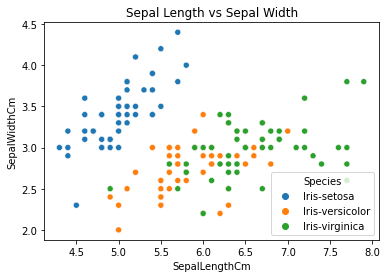

In [10]:
# SepalLength vs SepalWidth
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, hue = 'Species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [11]:
data['SepalLengthCm'].corr(data['SepalWidthCm'])

-0.10936924995064937

 Analysis : This is a negative correlation, which can be as a result of Iris-Setosa category.

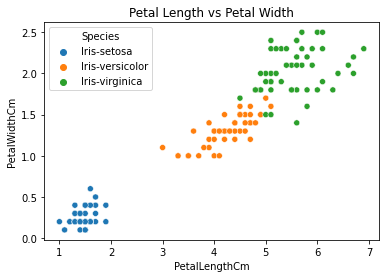

In [12]:
# Petallength vs PetalWidth
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = data ,hue ='Species')
plt.title('Petal Length vs Petal Width')
plt.show()

In [13]:
data['PetalLengthCm'].corr(data['PetalWidthCm'])

0.9627570970509663

Analysis: This displays a positive correlation

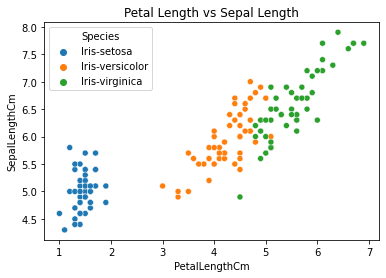

In [14]:
# PetalLength vs SepalLength
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data = data ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

In [15]:
data['PetalLengthCm'].corr(data['SepalLengthCm'])

0.8717541573048718

Analysis: There is a high correlation between petal length and sepal length.

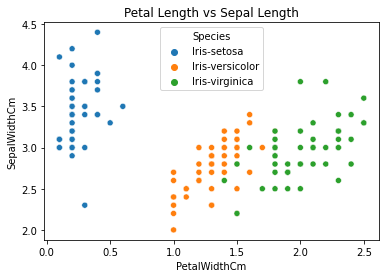

In [16]:
# PetalWidth vs SepalWidth
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm', data = data ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

In [17]:
data['PetalWidthCm'].corr(data['SepalWidthCm'])

-0.35654408961380535

Analysis: There is a negative correlation, which shows not a clear connection between the two variables.

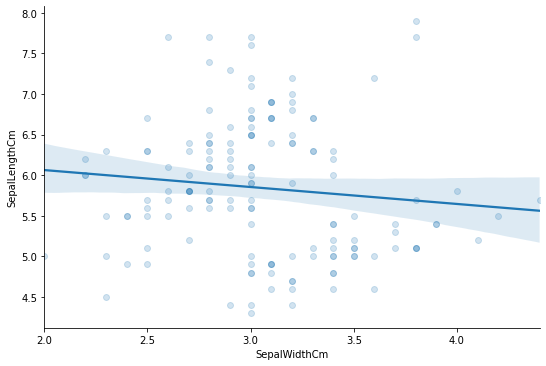

In [18]:
# Scatterplot with best fit line to explore relation b/w sepallength(dependent)& sepalwidth(Independent)
a=sns.lmplot(x='SepalWidthCm', y='SepalLengthCm', data=data, aspect=1.5, scatter_kws={'alpha':0.2})

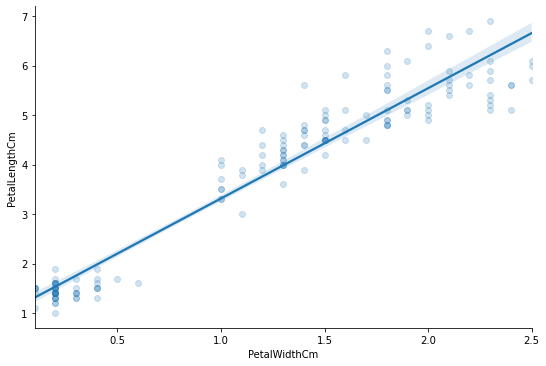

In [19]:
# Scatterplot with best fit line to explore relation b/w petallength(dependent)& petalwidth(Independent)
b=sns.lmplot(x='PetalWidthCm', y='PetalLengthCm', data=data, aspect=1.5, scatter_kws={'alpha':0.2})

# Linear Regression

In [20]:
#Checking the relationship between Sepal width and Sepal length
input_cols = ['SepalWidthCm']
output_variable = ['SepalLengthCm']
X = data[input_cols]
Y = data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')

[6.48122321]
[[-0.20887029]]




Explanation: Sepal.length = -0.2088*Sepal.Width + 6.481
An increase in sepal width will lead to a decrease in sepal length by 0.2088

In [21]:
#Checking the relationship between Petal width and Petal length
input_cols = ['PetalWidthCm']
output_variable = ['PetalLengthCm']
X = data[input_cols]
Y = data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')

[1.09057215]
[[2.22588531]]




Explanation: Petal.length = 2.2258*Petal.Width + 1.09057 An increase in petal width will lead to an increase in petal length by 2.22588

## Multivariate modelling

In [22]:
#Checking the relationship between Independent variables(Petal width,Petal Length and Sepal length) and dependent variable(Sepal width) (Multivariate Model)
input_cols = ['PetalWidthCm','PetalLengthCm','SepalWidthCm']
output_variable = ['SepalLengthCm']
X = data[input_cols]
Y = data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

print('\n')

[1.8450608]
[[-0.56256786  0.71106291  0.65486424]]




Explanation: Sepal.length = -0.56*Petal.Width + 0.71*Petal.Length + 0.65*Sepal.Width + 1.84
An increase in petal width will lead to a decrease of sepal length by 0.56

In [23]:
# Multivariate model with Sepallength, Sepalwidth, Petallength
input_cols = ['PetalLengthCm','SepalWidthCm']
output_variable = ['SepalLengthCm']
X = data[input_cols]
Y = data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')

[2.2512946]
[[0.47079369 0.59675252]]




Explanation: Sepal.length = 0.47Petal.Length + 0.59Sepal.Width + 2.25 .
An increase in petal length will lead to an increase in sepal length by 0.47

In [24]:
# Multivariate model with Sepallength, Sepalwidth, Petalwidth
input_cols = ['PetalWidthCm','SepalWidthCm']
output_variable = ['SepalLengthCm']
X = data[input_cols]
Y = data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')

[3.46477674]
[[0.96830173 0.39878375]]




Explanation: Sepal.length = 0.96Petal.Width + 0.39Sepal.Width + 3.46 . An increase in petal width will lead to an increase in sepal length by 0.96

In [25]:
#Check for multicollinearity through Determinant value
input_cols = ['PetalWidthCm','PetalLengthCm', 'SepalWidthCm']
output_variable = ['SepalLengthCm']
X = data[input_cols]
Y = data[output_variable]
corr = np.corrcoef(X, rowvar=0)
print(corr)
print('\n')

#Determinant value for Petalwidth,Petallength,sepalwidth
print (np.linalg.det(corr))

[[ 1.          0.9627571  -0.35654409]
 [ 0.9627571   1.         -0.4205161 ]
 [-0.35654409 -0.4205161   1.        ]]


0.05783850919062387


Explanation: Determinant value for petal width, petal length, sepal width =0.057 which indicates near multicollinearity.

### In conclusion, In this notebook we have tried establishing the linear realionships that exist between the Iris dataset.